In [1]:
#Install the depedencies 
 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


In [3]:
 #Get the shape of Dataset
df.shape

(1007, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700
1006,2019-12-16,300.850006,305.709991,298.630005,304.209991,304.209991,4658900


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1007.0,2.267081e+02,1.033054e+02,8.057000e+01,1.257800e+02,1.978500e+02,3.255300e+02,4.213800e+02
High,1007.0,2.299730e+02,1.048513e+02,8.470000e+01,1.271650e+02,1.994400e+02,3.308350e+02,4.232100e+02
Low,1007.0,2.231057e+02,1.014586e+02,7.995000e+01,1.243550e+02,1.953300e+02,3.188700e+02,4.130800e+02
Close,1007.0,2.266702e+02,1.032038e+02,8.279000e+01,1.255150e+02,1.980000e+02,3.252200e+02,4.189700e+02
Adj Close,1007.0,2.266702e+02,1.032038e+02,8.279000e+01,1.255150e+02,1.980000e+02,3.252200e+02,4.189700e+02
Volume,1007.0,9.730586e+06,6.398967e+06,1.616300e+06,5.573200e+06,7.857600e+06,1.178630e+07,5.841040e+07


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Adj Close'].value_counts()

Adj Close
96.669998     2
184.039993    2
183.600006    2
97.379997     2
188.539993    2
             ..
155.589996    1
157.250000    1
156.600006    1
156.380005    1
304.209991    1
Name: count, Length: 979, dtype: int64

<Axes: >

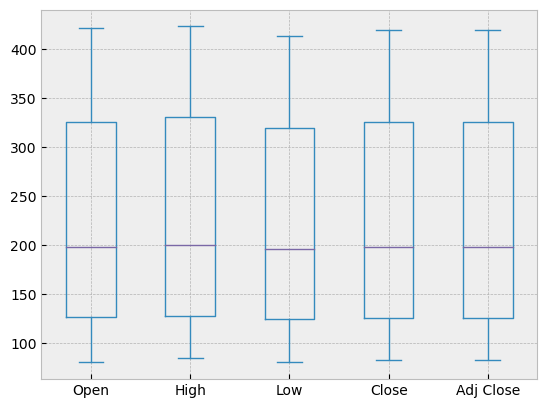

In [11]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

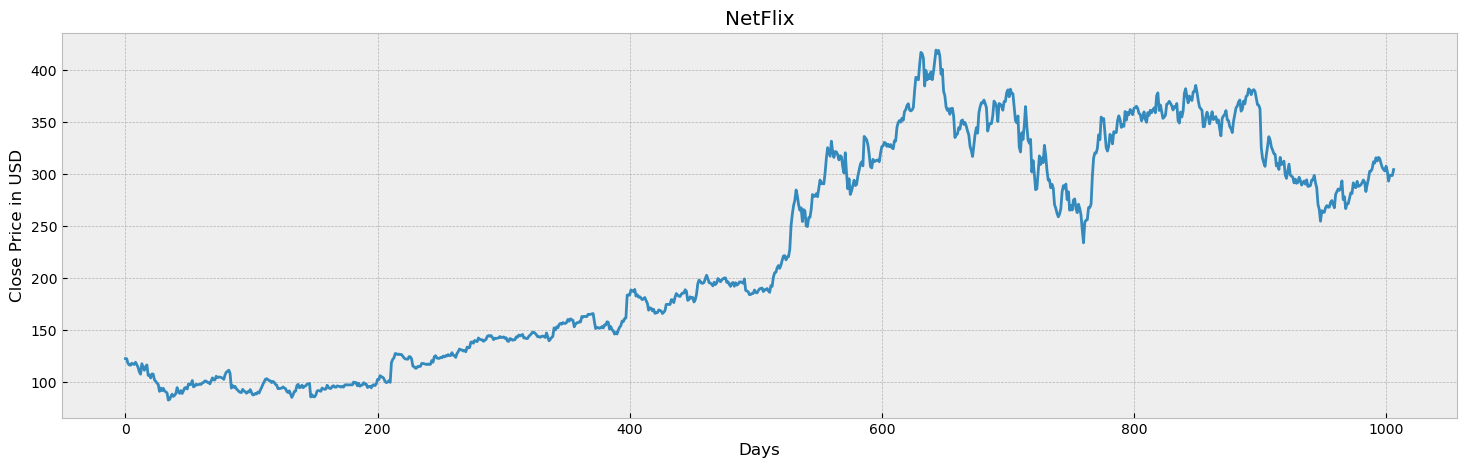

In [12]:
#Viulasie the close price
plt.figure(figsize=(18,5)) 
plt.title("NetFlix")
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [13]:
#Get the Close Price
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [14]:
#Craete a variable to predict the 'X' days out into future
future_days = 25
#Create a new Column (target) shifted 'X units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [15]:
#Craete the feature dataset (x) and cnvert it to numpy  array #dropping First 25
x = np.array(df.drop(['Prediction'],axis=1))[:-future_days]
print(x.shape)

(982, 1)


In [16]:
x

array([[122.639999],
       [122.510002],
       [118.019997],
       [116.629997],
       [116.239998],
       [118.160004],
       [117.330002],
       [117.110001],
       [119.120003],
       [116.709999],
       [114.379997],
       [109.959999],
       [107.660004],
       [117.68    ],
       [114.559998],
       [111.389999],
       [114.970001],
       [116.580002],
       [106.559998],
       [107.059998],
       [104.040001],
       [107.889999],
       [107.739998],
       [102.349998],
       [100.720001],
       [ 99.120003],
       [ 97.830002],
       [ 91.150002],
       [ 94.410004],
       [ 91.839996],
       [ 94.089996],
       [ 91.489998],
       [ 90.739998],
       [ 89.709999],
       [ 82.790001],
       [ 83.32    ],
       [ 86.129997],
       [ 88.449997],
       [ 86.349998],
       [ 87.400002],
       [ 89.050003],
       [ 94.760002],
       [ 90.489998],
       [ 89.230003],
       [ 91.93    ],
       [ 89.120003],
       [ 91.610001],
       [ 94.5

In [17]:
#Craete the target Data Set (y) and convert into numpy array and get all target values except last 'X' rows/days

y = np.array(df['Prediction'])[:-future_days]
print(y.shape)

(982,)


In [18]:
y

array([ 99.120003,  97.830002,  91.150002,  94.410004,  91.839996,
        94.089996,  91.489998,  90.739998,  89.709999,  82.790001,
        83.32    ,  86.129997,  88.449997,  86.349998,  87.400002,
        89.050003,  94.760002,  90.489998,  89.230003,  91.93    ,
        89.120003,  91.610001,  94.529999,  94.790001,  93.410004,
        98.300003,  97.610001,  97.93    , 101.580002,  95.489998,
        96.230003,  98.      ,  97.360001,  97.660004,  98.129997,
        97.860001,  99.349998,  99.720001, 101.120003, 101.059998,
        99.839996,  99.589996,  98.360001, 101.209999, 104.129997,
       102.190002, 102.230003, 105.699997, 104.349998, 104.940002,
       104.830002, 104.449997, 103.809998, 102.68    , 106.980003,
       109.650002, 110.419998, 111.510002, 108.400002,  94.339996,
        96.769997,  94.980003,  95.900002,  93.559998,  92.43    ,
        91.040001,  90.279999,  90.029999,  93.110001,  91.540001,
        90.790001,  89.370003,  90.839996,  90.540001,  92.889

In [19]:
#Splits the data into 75% training and  75% testing
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size = 0.25)

In [20]:
#Create a models
#Create a descison tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create a Linear Regression mmodel
lr = LinearRegression().fit(x_train,y_train)

In [21]:
#Show the model tree Prediction
tree_prediction = tree.predict(x_test)



In [22]:
from sklearn.metrics import accuracy_score,r2_score
model1=r2_score(tree_prediction,y_test)
print(model1)

0.9066372127820319


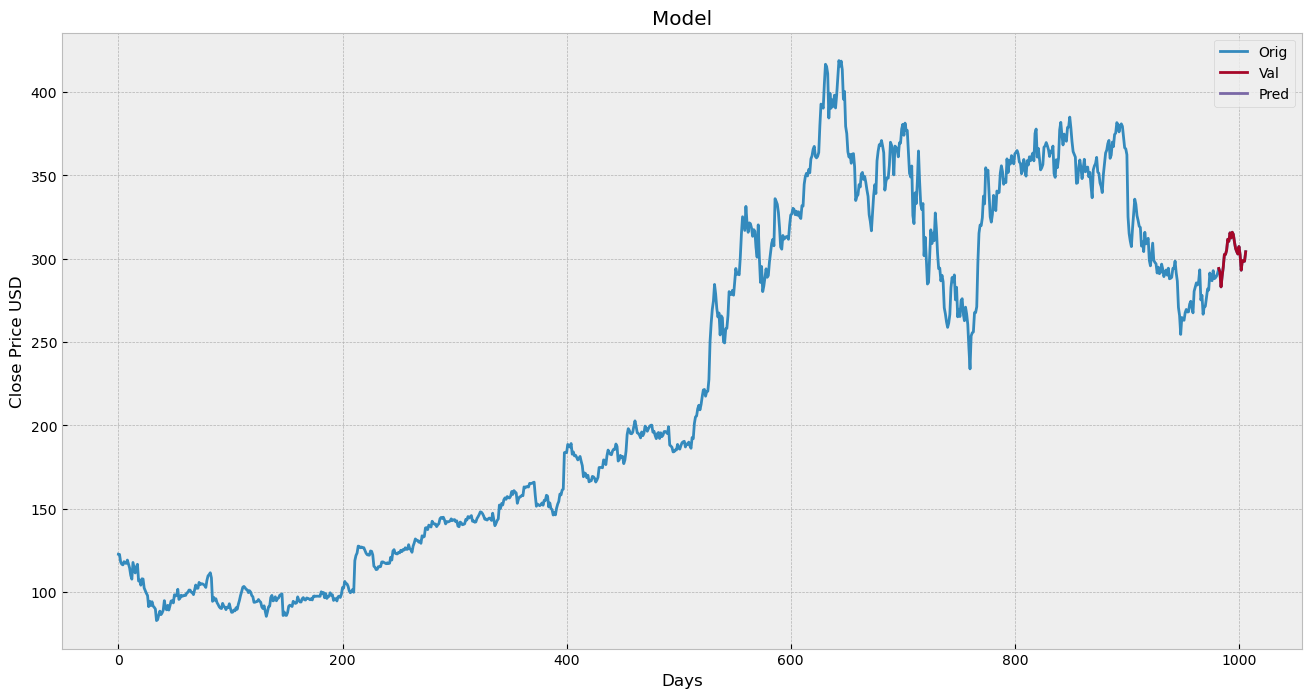

In [23]:
#Visualize the data
Prediction = tree_prediction

valid = df[x.shape[0]:]
#valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr_prediction = lr.predict(x_test)

In [27]:
model2=r2_score(lr_prediction,y_test)
print(model2)

0.9158324209310477


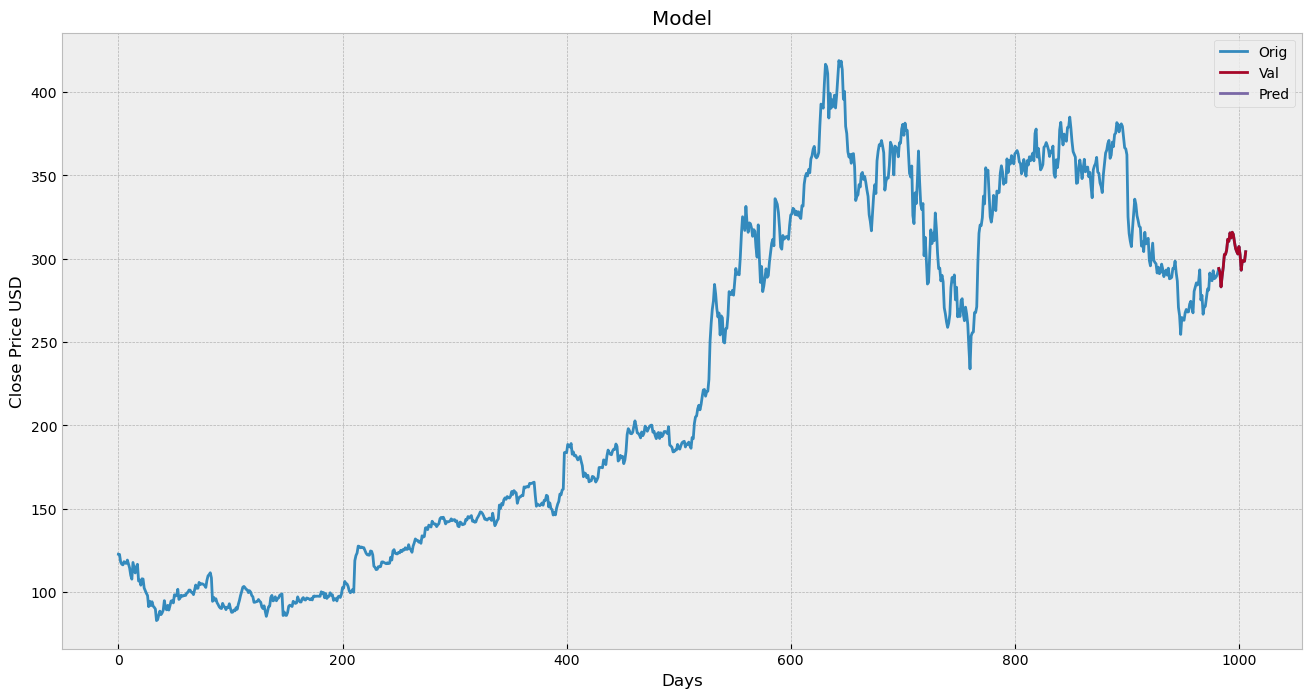

In [28]:
#Visualize the data
Prediction = lr_prediction

valid = df[x.shape[0]:]
#valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])

In [29]:
from sklearn.svm import SVR
svr=SVR(kernel = 'rbf').fit(x_train,y_train)
svr_prediction = svr.predict(x_test)


In [30]:
model3=r2_score(svr_prediction,y_test)
print(model3)

0.8745718687725508


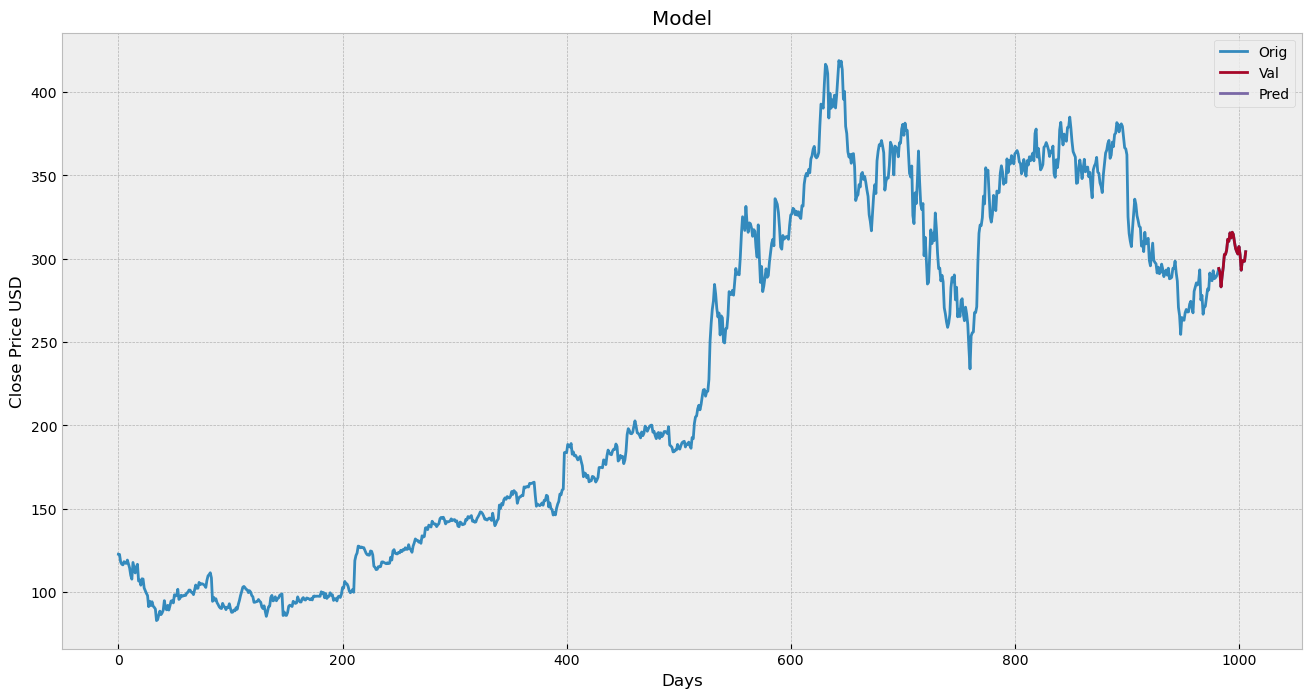

In [31]:
#Visualize the data
Prediction = svr_prediction

valid = df[x.shape[0]:]
#valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
kn=KNeighborsRegressor()

In [34]:
kn.fit(x_train , y_train)

KNeighborsRegressor()

In [35]:
print('accuracy of NIFTY: %.2f' %kn.score(x_train ,y_train))

accuracy of NIFTY: 0.97


In [36]:
import pickle
filename='netflix.sav'
pickle.dump(kn,open('netflix.sav','wb'))
loaded_model=pickle.load(open('netflix.sav','rb'))